1. [Приоритизация гипотез](#start)
    * [Просмотр датасета](#Viewing_data)
    * [Приоритизация гипотез фреймворком ICE](#ICE)
    * [Приоритизация гипотез фреймворком RICE](#RICE)
    
    
    
2. [Анализ A/B-теста](#A/B)
    * [Кумулятивная выручка по группам](#a)
    * [Кумулятивный средний чек по группам](#b)
    * [Кумулятивный средний чек группы B к группе A](#c)
    * [Кумулятивное среднее количество заказов по группам](#d)
    * [Кумулятивное среднее количество заказовов группы B к группе A](#e)
    * [График количества заказов по пользователям](#f)
    * [95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей](#g)
    * [Cтоимость заказов](#h)
    * [95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов](#i)
    * [Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным](#j)
    * [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#k)
    * [Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным](#l)
    * [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#m)
    * [Решение по результатам теста](#n)
    

3. [Общий вывод](#aa)   

## Приоритизация гипотез
<a id="start"></a> 

In [1]:
import pandas as pd #импортирование библиотек
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Просмотр датасета 
<a id="Viewing_data"></a> 

In [2]:
hypothesis = pd.read_csv('...') #чтение датасета

In [3]:
pd.options.display.max_colwidth = 100 #просмотр датасета
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
hypothesis.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Вывод**: 

В представленном датасете нет пропусков в столбца. Все типы данных правильные. 

### Приоритизация гипотез фреймворком ICE
<a id="ICE"></a> 

In [5]:
hypothesis['Ice']  = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'] #вычисление ICE
hypothesis['Ice'] = hypothesis['Ice'].round(2) #округление ICE до 2х знаков

In [6]:
hypothesis.head(5) #просмотр получившейся таблицы

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [7]:
hypothesis[['Hypothesis','Ice']].sort_values('Ice',ascending = False).head(5) #сортировка по параметру ICE

,Hypothesis,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00


### Приоритизация гипотез фреймворком RICE
<a id="RICE"></a> 

In [8]:
hypothesis['Rice'] = (hypothesis['Reach'] * hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'] 
#вычисление RICE

In [9]:
hypothesis.style.bar(subset=['Ice', 'Rice'], color='#d65f5f') #просмотр получившейся таблицы

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000


In [10]:
hypothesis[['Hypothesis','Rice']].sort_values('Rice',ascending = False).head(5) #сортировка по параметру RICE

,Hypothesis,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


**Вывод:**

При применении фреймворка `ICE` в приоритете оказались гипотезы: **8,0,7,6,2**. Но при подсчете `RICE` гипотезы остались теже, но последовательность изменилась на: **7,2,0,6,8**. Это произошло из-за того, что в `RICE` стало учитыватся скольких пользователей затронет изменение,которое хотят внести.

## Анализ A/B-теста
<a id="A/B"></a> 

In [11]:
orders = pd.read_csv('...') #чтение датасета

In [12]:
visitors = pd.read_csv('...') #чтение датасета

In [13]:
orders.head(5) #просмотр датасета

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders['date'] = pd.to_datetime(orders['date']) #изменения типа данных

In [16]:
print('Минимальное значение transactionId:', orders['transactionId'].min()) #просмотр корректности данных датасета orders
print('Максимальное значение transactionId:', orders['transactionId'].max())
print('Минимальное значение visitorId:', orders['visitorId'].min())
print('Максимальное значение visitorId:',orders['visitorId'].max())
print('Минимальное значение date:', orders['date'].min())
print('Максимальное значение date:',orders['date'].max())
print('Минимальное значение revenue:', orders['revenue'].min()) 
print('Максимальное значение revenue:', orders['revenue'].max()) 
print('Уникальное значение group:', orders['group'].unique())
print('Дубликатов в датафрейме orders:', orders.duplicated().sum())
print('Колличество участников в группе B:', orders['group'].loc[orders['group']=='B'].count())
print('Колличество участников в группе A:', orders['group'].loc[orders['group']=='A'].count())

Минимальное значение transactionId: 1062393
Максимальное значение transactionId: 4293855558
Минимальное значение visitorId: 5114589
Максимальное значение visitorId: 4283872382
Минимальное значение date: 2019-08-01 00:00:00
Максимальное значение date: 2019-08-31 00:00:00
Минимальное значение revenue: 50
Максимальное значение revenue: 1294500
Уникальное значение group: ['B' 'A']
Дубликатов в датафрейме orders: 0
Колличество участников в группе B: 640
Колличество участников в группе A: 557


In [17]:
groups_duplic = orders.groupby('visitorId')['group'].nunique().reset_index() #создание вспомогательной таблицы

In [18]:
groups_duplic.loc[groups_duplic['group']==2].count() #подсчет, сколько человек состояли в обеих группах

visitorId    58
group        58
dtype: int64

In [19]:
orders.info() #просмотр измнений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

In [20]:
visitors.head(5) #просмотр датасета

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
visitors['date'] = pd.to_datetime(visitors['date']) #изменения типа данных

In [23]:
print('Минимальное значение date:', visitors['date'].min()) #просмотр корректности данных датасета orders
print('Максимальное значение date:',visitors['date'].max())
print('Минимальное значение visitors:', visitors['visitors'].min()) 
print('Максимальное значение visitors:', visitors['visitors'].max()) 
print('Уникальное значение group:', visitors['group'].unique())
print('Дубликатов в датафрейме visitors:', visitors.duplicated().sum())

Минимальное значение date: 2019-08-01 00:00:00
Максимальное значение date: 2019-08-31 00:00:00
Минимальное значение visitors: 361
Максимальное значение visitors: 770
Уникальное значение group: ['A' 'B']
Дубликатов в датафрейме visitors: 0


In [24]:
visitors.info() #просмотр измнений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Вывод:**

В датасетах *orders* и *visitors*, не было замечено пропусков. Был изменен тип данных столбцов *date*. Так же в обоих датасетак не было выявлено неявных дубликатов. Так же не было выявленно подозрительных значений в столбцах, кроме максимального значения *revenue* в датасете **orders**(но данное значение можно будет проверить дальше в работе, если это понадобится).

Для проведения А/В теста, были выявленны такие данные:
- В А/В тесте 2 группы "А" и "В";
- Дата начала теста "2019-08-01", дата окончания теста "2019-08-31";
- Колличество участников в группе B: 640;
- Колличество участников в группе A: 557;
- Колличество участников в группе A и B одновременно: 58.


### Кумулятивная выручка по группам
<a id="a"></a> 

In [25]:
datesGroups = orders[['date','group']].drop_duplicates() #создание таблицы

In [26]:
datesGroups.head(5) #просмотр таблицы

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [27]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#агрегация значений.

In [28]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#получение агрегированных кумулятивных данных

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#объединенеие кумулятивных данных в одной таблице и присваивание ее столбцам понятных названий

In [30]:
cumulativeData.head(5)  #просмотр таблицы

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [32]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

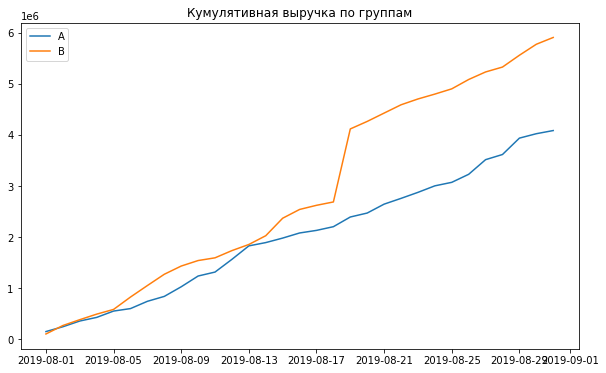

In [33]:
#строим график группы А
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#строим график группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show()

In [34]:
orders.loc[(orders['date']>='2019-08-18')&(orders['date']<='2019-08-19')&(orders['group']=='B')].sort_values(by='revenue', ascending=False).head()
#поиск причины скачка на графике

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
267,131747281,2579882178,2019-08-18,19538,B


**Вывод:**

Выручка до 18 августа шла примерно одинаково, но потом в группе **В** был зафиксирован резкий скачек вверх. Это скорее всего произошло 19 августа из-за большой цены заказа. Но так же нельзя отвергать теории, что на рост могло повлиять большое число заказов или технические неполадки.

### Кумулятивный средний чек по группам
<a id="b"></a> 

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#соединение таблиц

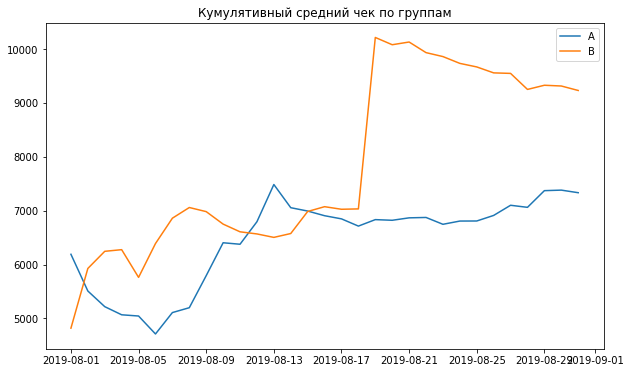

In [36]:
#строим график группы А
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
#строим график группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.show()

**Вывод:**

На данном графике ситуация схожа с куммулятивной выручкой. Но видны явные различия группы **А** от грууппы **В**. Так же видно, что идет резкий скачек 19 августа. Это может подтвердить теорию о скачке, в этот же день, на графике **'Кумулятивная выручка по группам'** из-за большой цены заказа.

### Кумулятивный средний чек группы B к группе A
<a id="c"></a> 

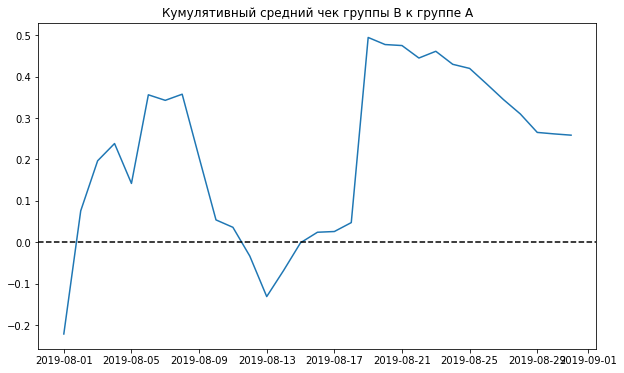

In [37]:
#постройка отношение средних чеков
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Кумулятивный средний чек группы B к группе A')
plt.show()

**Вывод:**

В целом, даный график отражает ту же ситуацию, что и график кумулятивного среднего чека по группам. С 1 по 6 августа наблюдается рост среднего чека в группе **B**, пока в группе **А** он уменьшался(пиковое значение разницы, примерно 35%), потом до 13 августа средний чек разных групп приближался друг к другу, в какойто момент чек группы **А** превылил группу **В** на примерно 15%. 18 августа идет резкий прыжок, из-за дорогого заказа в группе **В**(разница оказывается в районе 50%). Потом до 1 сентября идет небольшой спад, и разница к концу месяца составляет в районе 25%.

### Кумулятивное среднее количество заказов по группам
<a id="d"></a> 

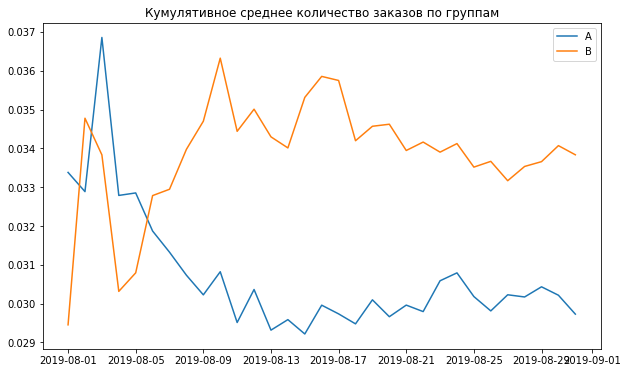

In [38]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] #подсчет среднего колличества заказов

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] #отделяем данные по группе A

cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] #отделяем данные по группе B

plt.figure(figsize=(10,6)) #построение графика
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.legend()
plt.show()

**Вывод:**

До 5 августа В обоих группах кумулятивное среднее количество заказов скачет. После чего до конца августа у группы **А** количество заказов пошло в низ и остается на стабильном низком уровне до конца месяца(от 0,029 до 0,031). Тем временем в группе **В** обратная ситуация, к 10 авгесту среднее взлетает до отметки 0.036, дальше идет постепенный спад, но все равно эта группа находиться на стабильно высоком уровне(0,033 до 0,034).

### Кумулятивное среднее количество заказовов группы B к группе A
<a id="e"></a> 

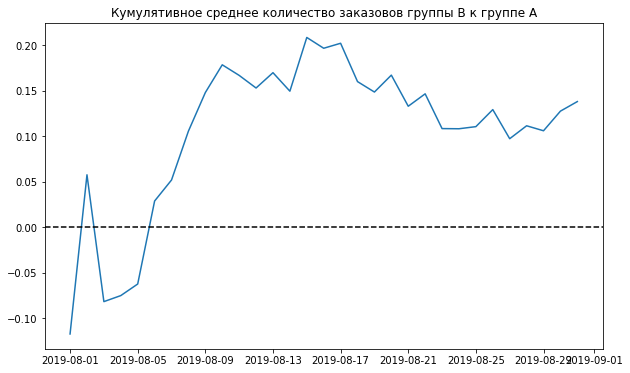

In [39]:
#нахождение кумулятивного среднего кол-ва заказов
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#построение графика
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Кумулятивное среднее количество заказовов группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**Вывод:**

На графике видно, что изначально среднее количество заказов преобладало в группе **А**(примерно на 15%). До 5 августа ситуация была не стабильна.И затем среднее колличество заказов в группе **В** превысило группу **А** на примерно 17%. И дальше разница продолжала оставаться на стабильно превышающем уровне(от 9 до 20 %)

### График количества заказов по пользователям
<a id="f"></a> 

In [40]:
orders.head(5) #просмотр таблицы

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [41]:
Users = (orders.drop(['group', 'revenue', 'date'], axis=1) #формирование таблицы
         .groupby('visitorId', as_index=False)
         .agg({'transactionId' : 'nunique'}))

In [42]:
Users.columns = ['userId', 'orders'] #переименование столбцов

In [43]:
Users.sort_values(by='orders',ascending=False).head(10) #сортировка по столбцу orders

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


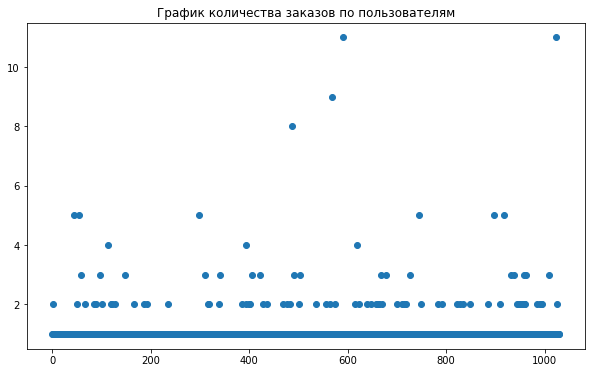

In [44]:
x_values = pd.Series(range(0,len(Users)))
#создание графика
plt.figure(figsize=(10,6)) 
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, Users['orders']) 
plt.show()

**Вывод:**

Чаще всего пользователи не делали больше 2х заказов. 

### 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей
<a id="g"></a> 

In [45]:
np.percentile(Users['orders'], [95, 99]) #подсчет выборочных перцентилей количества

array([2., 4.])

In [46]:
np.percentile(Users['orders'], [93,94,95,96,97,98,99]) #поиск границы для определения аномального количества заказов

array([2., 2., 2., 2., 2., 3., 4.])

**Вывод:**

По данным видно, что не более 2% пользователей делают более 2х заказов. Так что, если пользователь делает больше 2х заказов, это можно считать аномалией.

### Cтоимость заказов
<a id="h"></a> 

In [47]:
orders.head(5) #просмотр таблицы

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [48]:
transaction = (orders.drop(['group', 'visitorId', 'date'], axis=1)) #изменение таблицы

In [49]:
transaction #просмотр таблицы

,transactionId,revenue
0,3667963787,1650
1,2804400009,730
2,2961555356,400
3,3797467345,9759
4,2282983706,2308
...,...,...
1192,2662137336,6490
1193,2203539145,3190
1194,1807773912,10550
1195,1947021204,100


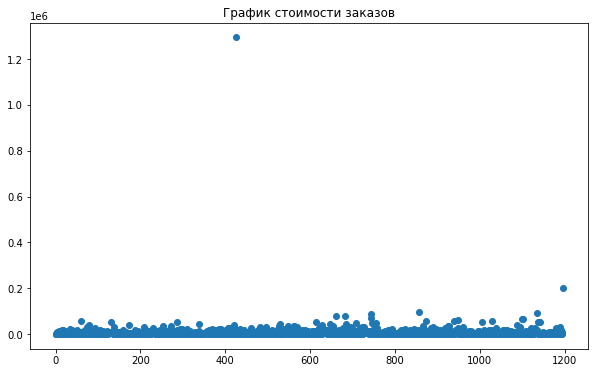

In [50]:
x_values = pd.Series(range(0,len(transaction)))
#постройка графика
plt.figure(figsize=(10,6))
plt.title('График стоимости заказов')
plt.scatter(x_values, transaction['revenue']) 
plt.show()

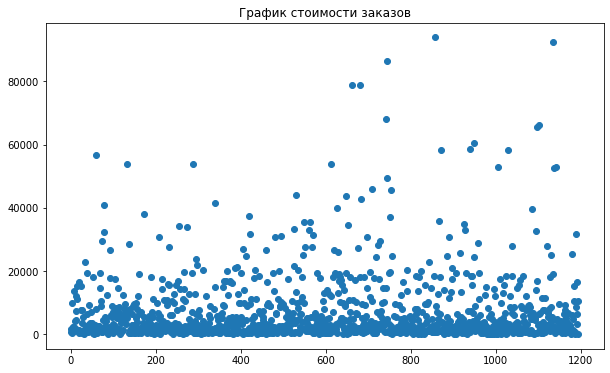

In [51]:
#удаление большого разброса
transaction = transaction.loc[transaction['revenue']<200000]

x_values = pd.Series(range(0,len(transaction)))
#постройка графика
plt.figure(figsize=(10,6))
plt.title('График стоимости заказов')
plt.scatter(x_values, transaction['revenue'])
plt.show()

**Вывод:**

По графику видно, что чаще всего заказы не привышают 20000.

### 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов
<a id="i"></a> 

In [52]:
np.percentile(transaction['revenue'], [95, 99]) #посчет выборочных перцентилей количества

array([27565. , 56744.2])

In [53]:
np.percentile(transaction['revenue'], [93,94,95,96,97,98,99]) #поиск границы для определения аномальной суммы заказов

array([20990.  , 24906.8 , 27565.  , 30730.84, 34629.2 , 42854.  ,
       56744.2 ])

**Вывод:**

При поиске границы для определения аномальной суммы заказов, резко сумма начала расти после показателя 34629.2. Это значит, что не более 3% пользователей тратят больше этой суммы заказа. Данное значение можно установить как границу аномальной.

### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным
<a id="j"></a> 

Для обоснования своего выбора будет применятся критерий **Манна-Уитни**, так как он дает работать с данными где есть выбросы, сильно сдвигающие параметрические результаты.

**Уровень значимости**(alpha) применяем как 0,05.

**Сформулируем нулевую гипотизу**:  Статистически значимых различий в среднем количестве заказов между группами нет

**Сформулируем альтернативную гипотизу**: Статистически значимые различия в среднем количестве заказов между группами есть 

In [54]:
visitors.head() #просмотр таблицы

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [55]:
orders.head() #просмотр таблицы

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [56]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']] #подготовка данных
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily =(orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
               .groupby('date', as_index=False)
               .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateA': 'sum',
                                              'revenuePerDateA': 'sum'}),axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

ordersBDaily =(orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
               .groupby('date', as_index=False)
               .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                        .agg({'date': 'max', 'ordersPerDateB': 'sum',
                                              'revenuePerDateB': 'sum'}),axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Далее:
1) **Применим критерий и отформатируем p-value**, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

2) **Выведем относительный прирост среднего числа заказов группы B:** среднее число заказов группы B / среднее число заказов группы A - 1.

In [57]:
#подсчет статистической значимости различия в среднем количестве заказов между группами
ordersByUsersA = (orders[orders['group'] == 'A'] 
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


**Вывод:**

По «сырым» данным различия в среднем числе заказов групп A и B есть.

p-value = 0.017, что меньше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами скорее всего не верна, в данном случае **отвергаем** её. Относительный выигрыш группы B равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
<a id="k"></a> 

**Сформулируем нулевую гипотизу**:  Статистически значимых различий в среднем чеке между группами нет

**Сформулируем альтернативную гипотизу**: Статистически значимые различия в среднем чеке между группами есть 

In [58]:
#подсчет и вывод статистической значимости различия в среднем чеке между группами
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))  

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


**Вывод**

По «сырым» данным различий в среднем чеке групп A и B нет.

p-value = 0.729, что больше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем чеке между группами верна, **не отвергаем** её. Относительный выигрыш группы B равен 25.9%.

### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным
<a id="l"></a> 

**Сформулируем нулевую гипотизу**:  Статистически значимых различий в среднем количестве заказов между группами нет

**Сформулируем альтернативную гипотизу**: Статистически значимые различия в среднем количестве заказов между группами есть 

In [59]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 34629.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print('Аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
dtype: int64
Аномальных пользователей: 54


In [60]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                    name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0) 

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.009
Относительный показатель 'B' и 'A' = 0.181


**Вывод:**

По «очищенным» данным различия в среднем числе заказов групп A и B есть.

p-value = 0.009, что меньше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами не верна, **отвергаем** её. Относительный выигрыш группы B равен 18.1%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
<a id="m"></a> 

**Сформулируем нулевую гипотизу**:  Статистически значимых различий в среднем чеке между группами нет

**Сформулируем альтернативную гипотизу**: Статистически значимые различия в среднем чеке между группами есть 

In [61]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu
                       (orders[np.logical_and(orders['group'] == 'A',
                                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                        orders[np.logical_and(orders['group'] == 'B',
                                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 



alpha = 0.05
p-value = 0.931
Относительный показатель 'B' и 'A' = 0.033


**Вывод:**

По «очищенным» данным различий в среднем чеке групп A и B нет.

p-value = 0.931, что больше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем чеке между группами верна, **не отвергаем** её. Относительный выигрыш группы B равен 3.3%.

### Решение по результатам теста
<a id="n"></a> 

Можно остановить тест, сделав выывод что:

* Статистически значимые различия в среднем количестве заказов между группами есть. Группа **B** выигрывает по заказам на 18.1%.
* Статистически значимых различий в среднем чеке между группами нет. Относительный выигрыш группы **B** равен 3.3%.

## Общий вывод
<a id="aa"></a> 

**При подготовке к  А/В тесту, было выясненно, что:**

В датасетах *orders* и *visitors*, не было замечено пропусков. Был изменен тип данных столбцов *date*. Так же в обоих датасетак не было выявлено неявных дубликатов. Так же не было выявленно подозрительных значений в столбцах, кроме максимального значения *revenue* в датасете **orders**(но данное значение можно будет проверить дальше в работе, если это понадобится).

Для проведения А/В теста, были выявленны такие данные:
- В А/В тесте 2 группы "А" и "В";
- Дата начала теста "2019-08-01", дата окончания теста "2019-08-31";
- Колличество участников в группе B: 640;
- Колличество участников в группе A: 557;
- Колличество участников в группе A и B одновременно: 58.

**При анализе A/B теста было выявлено, что:**

* Выручка до 18 августа шла примерно одинаково, но потом в группе **В** был зафиксирован резкий скачек вверх. Это скорее всего произошло 19 августа из-за большой цены заказа. Но так же нельзя отвергать теории, что на рост могло повлиять большое число заказов или технические неполадки.


* На  графике 'Кумулятивный средний чек по группам' ситуация схожа с куммулятивной выручкой. Но видны явные различия группы **А** от грууппы **В**. Так же видно, что идет резкий скачек 19 августа. Это может подтвердить теорию о скачке, в этот же день, на графике **'Кумулятивная выручка по группам'** из-за большой цены заказа.


* В целом, график 'Кумулятивный средний чек группы B к группе A' отражает ту же ситуацию, что и график 'Кумулятивный средний чек по группам'. С 1 по 6 августа наблюдается рост среднего чека в группе **B**, пока в группе **А** он уменьшался(пиковое значение разницы, примерно 35%), потом до 13 августа средний чек разных групп приближался друг к другу, в какойто момент чек группы **А** превылил группу **В** на примерно 15%. 18 августа идет резкий прыжок, из-за дорогого заказа в группе **В**(разница оказывается в районе 50%). Потом до 1 сентября идет небольшой спад, и разница к концу месяца составляет в районе 25%.


* До 5 августа В обоих группах кумулятивное среднее количество заказов скачет. После чего до конца августа у группы **А** количество заказов пошло в низ и остается на стабильном низком уровне до конца месяца(от 0,029 до 0,031). Тем временем в группе **В** обратная ситуация, к 10 авгесту среднее взлетает до отметки 0.036, дальше идет постепенный спад, но все равно эта группа находиться на стабильно высоком уровне(0,033 до 0,034).


* На графике 'Кумулятивное среднее количество заказовов группы B к группе A' видно, что изначально среднее количество заказов преобладало в группе **А**(примерно на 15%). До 5 августа ситуация была не стабильна.И затем среднее колличество заказов в группе **В** превысило группу **А** на примерно 17%. И дальше разница продолжала оставаться на стабильно превышающем уровне(от 9 до 20 %)


* Не более 2% пользователей делают более 2х заказов. Так что, если пользователь делает больше 2х заказов, это можно считать аномалией.


* По графику 'График стоимости заказов' видно, что чаще всего заказы не привышают 20000.


* При поиске границы для определения аномальной суммы заказов, резко сумма начала расти после показателя 34629.2. Это значит, что не более 3% пользователей тратят больше этой суммы заказа. Данное значение можно установить как границу аномальной.


* По «сырым» данным различия в среднем числе заказов групп A и B есть.
p-value = 0.017, что меньше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами скорее всего не верна, в данном случае **отвергаем** её. Относительный выигрыш группы B равен 13.8%.


* По «сырым» данным различий в среднем чеке групп A и B нет.
p-value = 0.729, что больше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем чеке между группами верна, **не отвергаем** её. Относительный выигрыш группы B равен 25.9%.


* По «очищенным» данным различия в среднем числе заказов групп A и B есть.
p-value = 0.009, что меньше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем числе заказов между группами не верна, **отвергаем** её. Относительный выигрыш группы B равен 18.1%.


* По «очищенным» данным различий в среднем чеке групп A и B нет.
p-value = 0.931, что больше 0.05. Значит, нулевая гипотеза о том, что статистически значимых различий в среднем чеке между группами верна, **не отвергаем** её. Относительный выигрыш группы B равен 3.3%.

**Решением по результату теста стали:**

* Можно остановить тест;
* Статистически значимые различия в среднем количестве заказов между группами есть. Группа **B** выигрывает по заказам на 18.1%;
* Статистически значимых различий в среднем чеке между группами нет. Относительный выигрыш группы **B** равен 3.3%.